En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [2]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [3]:
# Se cargan los datos de la hoja llamada Accesos Por Tecnología 
df_internet_axt = pd.read_excel('../Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')

In [4]:
df_internet_axt

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_internet_axt.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [6]:
# Verificación de registros duplicados
duplicados = df_internet_axt.duplicated().sum()
duplicados

0

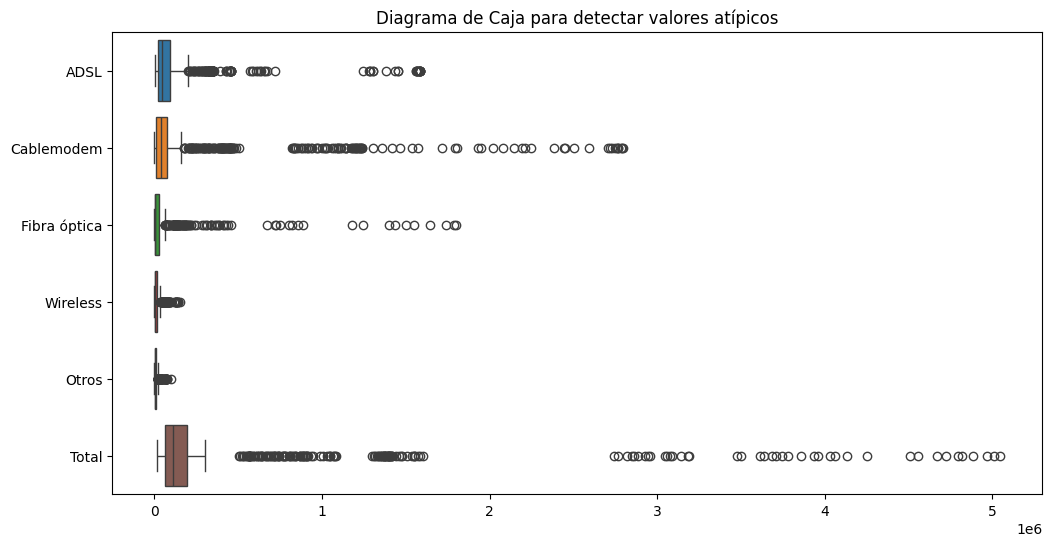

In [7]:
# Se crea un boxplot para detectar valores atípicos

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_internet_axt, orient='h')
plt.title('Diagrama de Caja para detectar valores atípicos')
plt.show()

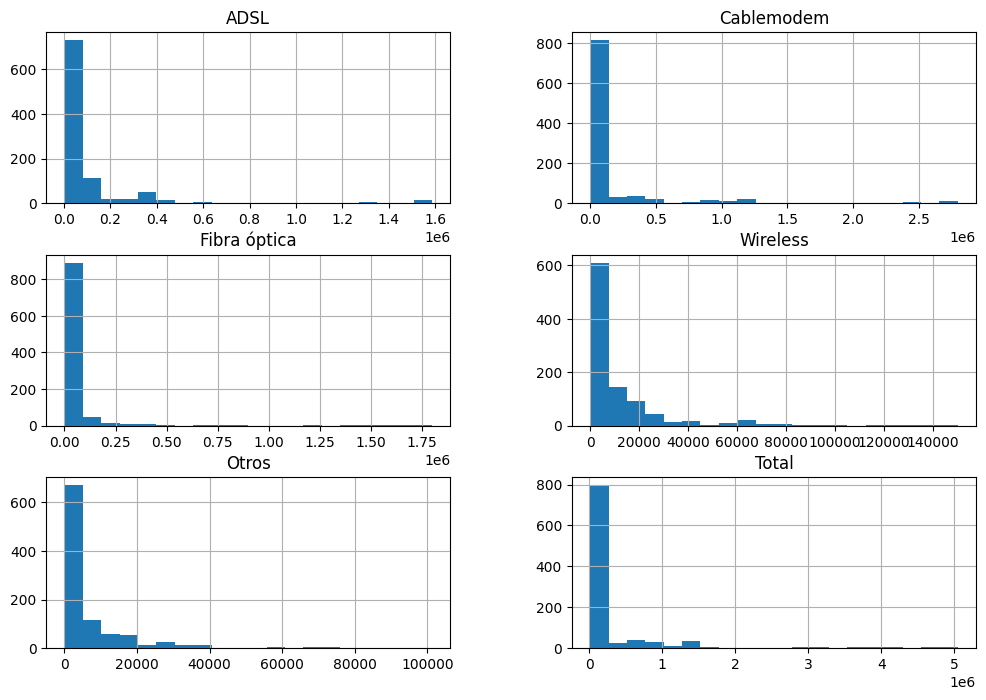

In [11]:
# Histograma para columnas numéricas
df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].hist(bins=20, figsize=(12, 8))
plt.show()


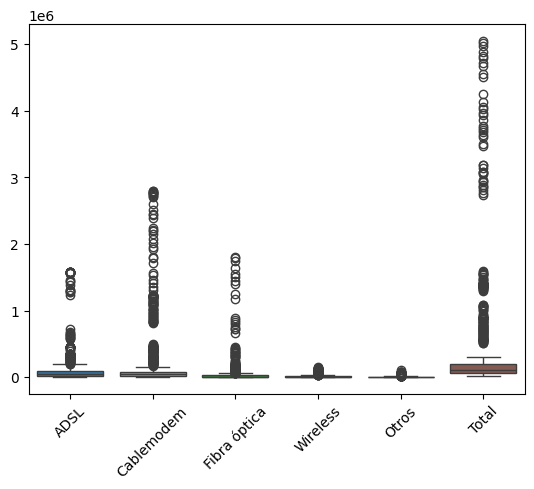

In [8]:
# Boxplot para ver la distribución y posibles outliers

sns.boxplot(data=df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']])
plt.xticks(rotation=45)
plt.show()


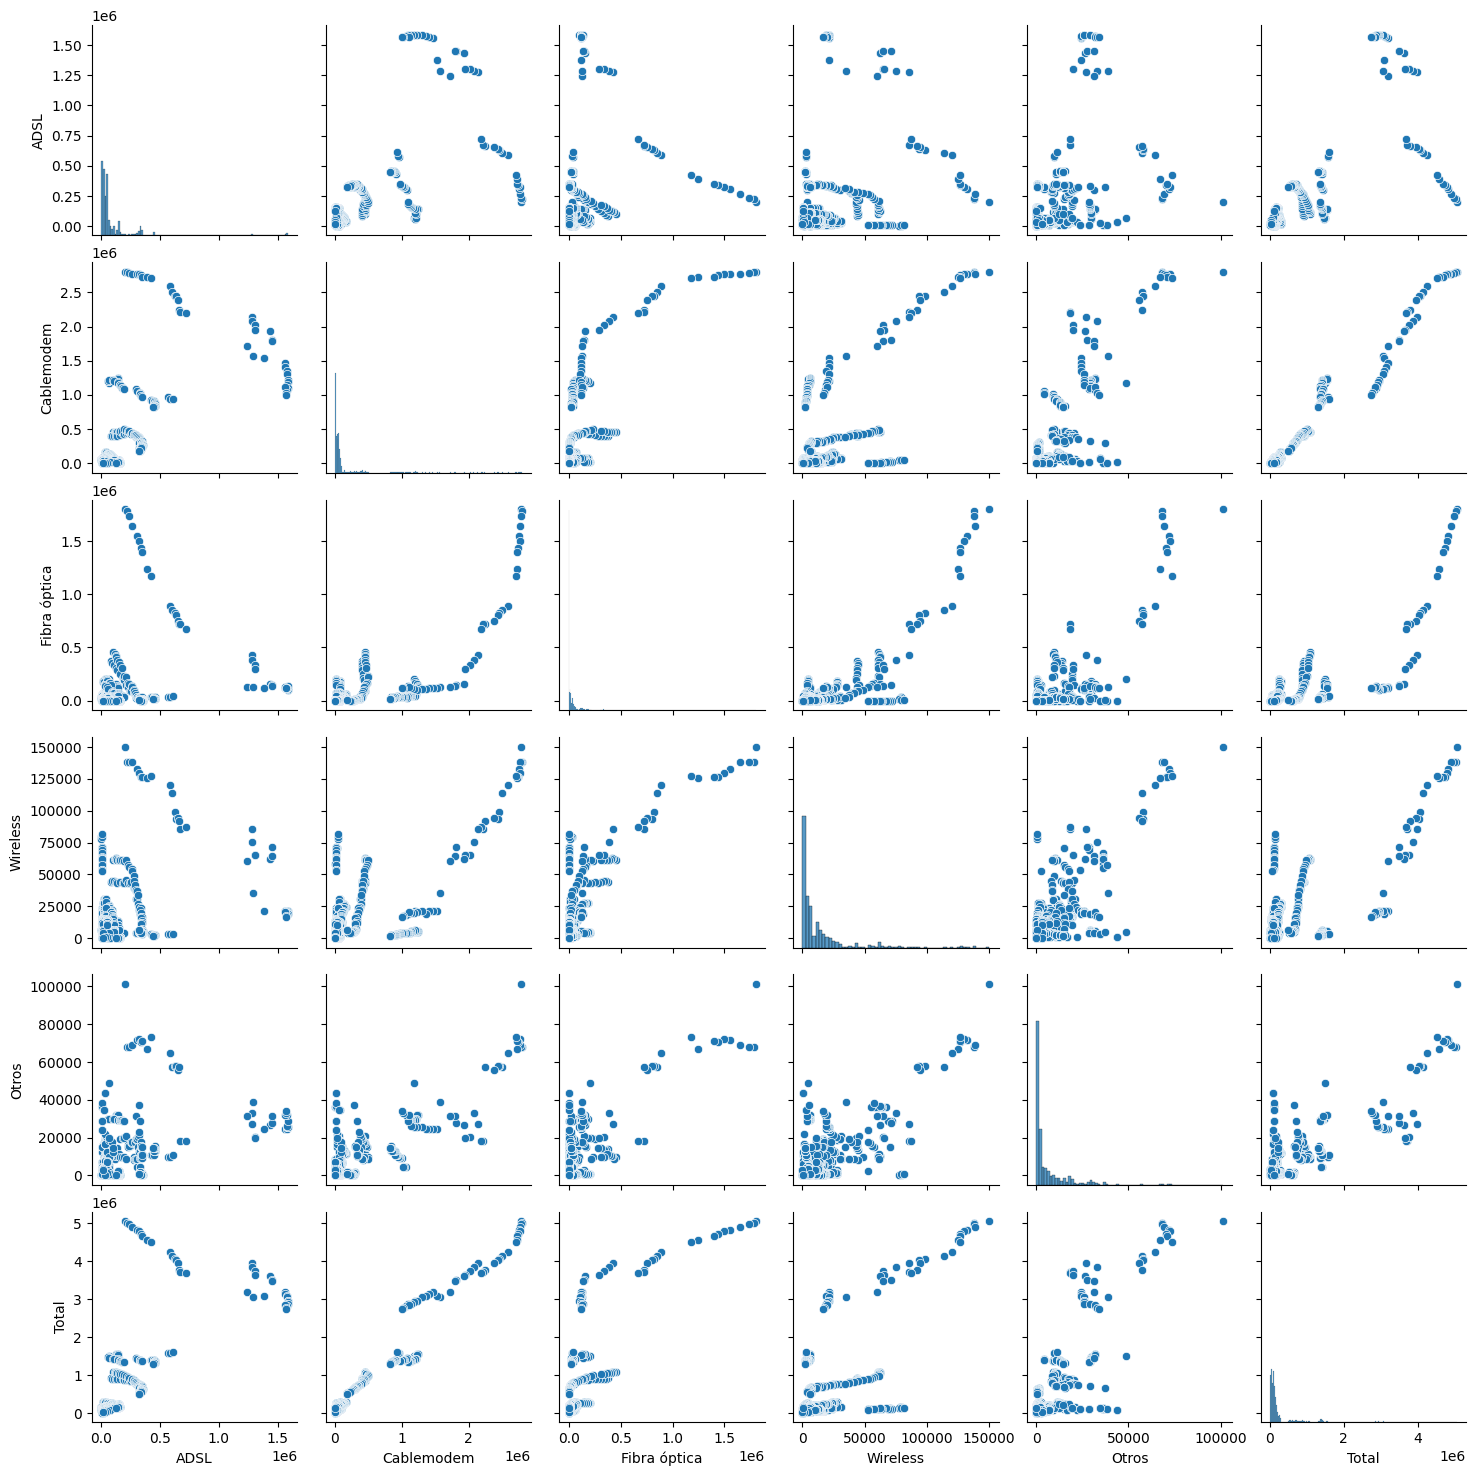

ValueError: 'q' is a bad directive in format '%Y%q0'

In [18]:
# Gráficas de dispersión para ver la relación entre columnas numéricas
sns.pairplot(df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']])
plt.show()




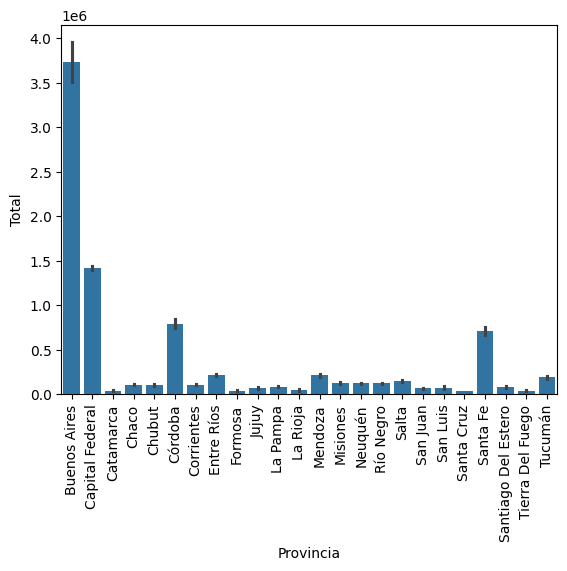

In [19]:
# Analizar la relación entre el tipo de conexión y la provincia
sns.barplot(data=df_internet_axt, x='Provincia', y='Total')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Analizar la tendencia a lo largo del tiempo
df_internet_axt['Fecha'] = pd.to_datetime(df_internet_axt['Año'].astype(str) + df_internet_axt['Trimestre'].astype(str) + '0', format='%Y%q0')
df_internet_axt.set_index('Fecha', inplace=True)

df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].plot(figsize=(12, 8))
plt.title('Tendencias a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(loc='best')
plt.show()

ValueError: 'q' is a bad directive in format '%Y%q0'

In [22]:
# Resumen mensual o trimestral
df_resampled = df_internet_axt.resample('Q').sum()
df_resampled[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].plot(figsize=(12, 8))
plt.title('Tendencias trimestrales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(loc='best')
plt.show()


C:\Users\cgabr\AppData\Local\Temp\ipykernel_12292\2624316519.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_resampled = df_internet_axt.resample('Q').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

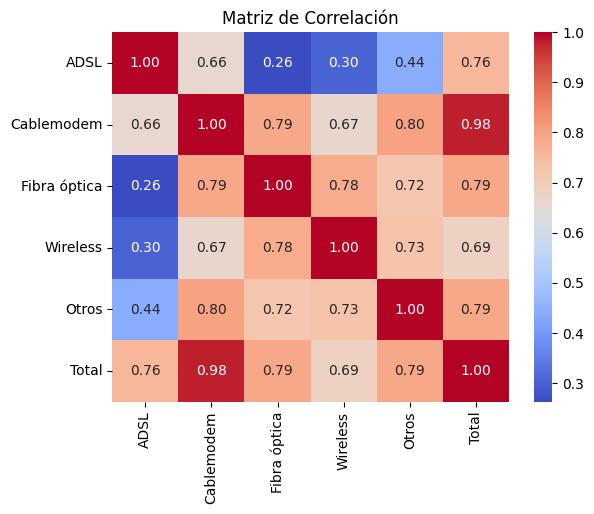

In [23]:
# Correlación entre las variables
correlation_matrix = df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Analiza los resultados y tendencias observadas. Busca patrones, anomalías o insights relevantes.

Tendencias temporales: ¿Cómo cambian los tipos de conexión a lo largo del tiempo?
Diferencias entre provincias: ¿Existen provincias con un uso significativamente mayor de ciertos tipos de conexión?
Distribución y correlaciones: ¿Hay alguna relación fuerte entre el uso de diferentes tipos de conexión?